# Web Scraping e Análise de Dados da NFL

A Ciência de Dados está em todos os lugares. Se há dados disponíveis, podemos extrair, analisar e gerar insights poderosos. E no esporte não seria diferente.

Cada vez mais gestores de todos os esportes descobrem os benefícios e vantagem competitiva em usar análise de dados para compreender o desempenho do time, comportamento dos atletas, unir atletas com características complementares no mesmo time e muito mais.

Neste Projeto, vamos extrair dados reais de jogos da NFL - a Liga de Futebol Americano dos EUA - da temporada 2021/2022 e analisar os dados.

In [2]:
!pip install -q -U pingouin

In [1]:
# Imports para Web Scraping
import bs4
import csv 
import requests 
from bs4 import BeautifulSoup

# Imports para manipulação, visualização e análise de dados
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg

## Scraper 

In [64]:
#criamos um arquivo para salvar o resultado do web scraping
arquivo=csv.writer(open('nfl.csv','w', encoding="utf-8"))

In [65]:
#fazemos requisição à página web que iremos coletar os dados
pagina=requests.get("https://www.pro-football-reference.com/years/2021/games.htm#site_menu_link.html")

In [66]:
#o código 200 nos informa que a requisição foi feita com sucesso
pagina

<Response [200]>

In [67]:
#visualização do conteúdo que foi raspado
pagina.text

'\n<!DOCTYPE html>\n<html data-version="klecko-" data-root="/home/pfr/build" lang="en" class="no-js" >\n<head>\n    <meta charset="utf-8">\n    <meta http-equiv="x-ua-compatible" content="ie=edge">\n    <meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=2.0" />\n    <link rel="dns-prefetch" href="https://d2p3bygnnzw9w3.cloudfront.net/req/202206141" />\n    <!-- Quantcast Choice. Consent Manager Tag v2.0 (for TCF 2.0) -->\n<script type="text/javascript" async=true>\n    (function() {\n\tvar host = window.location.hostname;\n\tvar element = document.createElement(\'script\');\n\tvar firstScript = document.getElementsByTagName(\'script\')[0];\n\tvar url = \'https://quantcast.mgr.consensu.org\'\n\t    .concat(\'/choice/\', \'XwNYEpNeFfhfr\', \'/\', host, \'/choice.js\')\n\tvar uspTries = 0;\n\tvar uspTriesLimit = 3;\n\telement.async = true;\n\telement.type = \'text/javascript\';\n\telement.src = url;\n\t\n\tfirstScript.parentNode.insertBefore(element, first

In [68]:
#fazemos o parser para que o conteúdo fique no padrão HTML, ou seja, com as tags
soup=BeautifulSoup(pagina.text,'html.parser')

In [69]:
soup


<!DOCTYPE html>

<html class="no-js" data-root="/home/pfr/build" data-version="klecko-" lang="en">
<head>
<meta charset="utf-8"/>
<meta content="ie=edge" http-equiv="x-ua-compatible"/>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=2.0" name="viewport">
<link href="https://d2p3bygnnzw9w3.cloudfront.net/req/202206141" rel="dns-prefetch"/>
<!-- Quantcast Choice. Consent Manager Tag v2.0 (for TCF 2.0) -->
<script async="true" type="text/javascript">
    (function() {
	var host = window.location.hostname;
	var element = document.createElement('script');
	var firstScript = document.getElementsByTagName('script')[0];
	var url = 'https://quantcast.mgr.consensu.org'
	    .concat('/choice/', 'XwNYEpNeFfhfr', '/', host, '/choice.js')
	var uspTries = 0;
	var uspTriesLimit = 3;
	element.async = true;
	element.type = 'text/javascript';
	element.src = url;
	
	firstScript.parentNode.insertBefore(element, firstScript);
	
	function makeStub() {
	    var TCF_LOCATOR_NAME = '__tcfap

In [70]:
#buscamos pela tag e classe que estão os dados que vamos extrair
tabela=soup.find("div",{"class":"table_container"})

In [71]:
tabela

<div class="table_container" id="div_games">
<table class="sortable stats_table" data-cols-to-freeze="1,3" id="games">
<caption>Week-by-Week Games Table</caption>
<colgroup><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/></colgroup>
<thead>
<tr>
<th aria-label="Week" class="poptip sort_default_asc sorttable_nosort center" data-stat="week_num" data-tip="Week number in season" scope="col">Week</th>
<th aria-label="Day" class="poptip sort_default_asc left" data-stat="game_day_of_week" scope="col">Day</th>
<th aria-label="Date" class="poptip sort_default_asc center" data-stat="game_date" scope="col">Date</th>
<th aria-label="Time" class="poptip sort_default_asc center" data-stat="gametime" data-tip="Game Time, Eastern" scope="col">Time</th>
<th aria-label="Winner/tie" class="poptip sort_default_asc center" data-stat="winner" scope="col">Winner/tie</th>
<th aria-label="" class="poptip sort_default_asc center" data-stat="game_location" scope="col"></th>
<t

In [72]:
#extraímos o cabeçalho da tabela no qual contém os títulos das colunas
header=tabela.find("thead")
header_elements=header.find_all("th")
header_elements=[head.text for head in header_elements]

In [73]:
arquivo.writerow(header_elements)

69

In [74]:
#buscamos o corpo da tabela para retirar o conteúdo das linhas
elementos_linha=tabela.find("tbody")

In [75]:
elementos_linha

<tbody><tr><th class="right" csk="1" data-stat="week_num" scope="row">1</th><td class="left" data-stat="game_day_of_week">Thu</td><td class="left" csk="2021-09-09" data-stat="game_date">2021-09-09</td><td class="right" data-stat="gametime">8:20PM</td><td class="left" data-stat="winner"><strong><a href="/teams/tam/2021.htm">Tampa Bay Buccaneers</a></strong></td><td class="right iz" data-stat="game_location"></td><td class="left" data-stat="loser"><a href="/teams/dal/2021.htm">Dallas Cowboys</a></td><td class="center" data-stat="boxscore_word"><a href="/boxscores/202109090tam.htm">boxscore</a></td><td class="right" data-stat="pts_win"><strong>31</strong></td><td class="right" data-stat="pts_lose">29</td><td class="right" data-stat="yards_win">431</td><td class="right" data-stat="to_win">4</td><td class="right" data-stat="yards_lose">451</td><td class="right" data-stat="to_lose">1</td></tr>
<tr><th class="right" csk="1" data-stat="week_num" scope="row">1</th><td class="left" data-stat="ga

In [80]:
#extraímos o conteúdo de cada linha e gravamos no arquivo
for row in elementos_linha('tr'):
    data_elements=row.find_all("th","td")
    data_elements=[data.text for data in data_elements]
    arquivo.writerow(data_elements)

## Análise de Dados 

In [2]:
#abrimos o arquivo como um DataFrame
df_nfl=pd.read_csv('nfl.csv')

In [92]:
df_nfl

,Week,Day,Date,Time,Winner/tie,Unnamed: 5,Loser/tie,Unnamed: 7,Pts,Pts.1,YdsW,TOW,YdsL,TOL
0,Thu,2021-09-09,8:20PM,Tampa Bay Buccaneers,NaN,Dallas Cowboys,boxscore,31.0,29.0,431.0,4.0,451.0,1.0,NaN
1,Thu,2021-09-09,8:20PM,Tampa Bay Buccaneers,NaN,Dallas Cowboys,boxscore,31.0,29.0,431.0,4.0,451.0,1.0,NaN
2,Thu,2021-09-09,8:20PM,Tampa Bay Buccaneers,NaN,Dallas Cowboys,boxscore,31.0,29.0,431.0,4.0,451.0,1.0,NaN
3,Thu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Thu,2021-09-09,8:20PM,Tampa Bay Buccaneers,NaN,Dallas Cowboys,boxscore,31.0,29.0,431.0,4.0,451.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,Sun,2022-01-23,3:00PM,Los Angeles Rams,@,Tampa Bay Buccaneers,boxscore,30.0,27.0,428.0,4.0,359.0,2.0,NaN
287,Sun,2022-01-23,6:30PM,Kansas City Chiefs,NaN,Buffalo Bills,boxscore,42.0,36.0,552.0,0.0,422.0,0.0,NaN
288,Sun,2022-01-30,3:00PM,Cincinnati Bengals,@,Kansas City Chiefs,boxscore,27.0,24.0,359.0,1.0,375.0,2.0,NaN
289,Sun,2022-01-30,6:30PM,Los Angeles Rams,NaN,San Francisco 49ers,boxscore,20.0,17.0,396.0,1.0,282.0,1.0,NaN


Podemos ver que o arquivo contém 291 linhas e 14 colunas.

Houve um erro no scraping e não foram coletados os dados da coluna Week, assim os dados das outras colunas foram "empurrados" para a esquerda. Também houve repetição das primeiras linhas da tabela. Então vamos deletar as duplicidades e renomear as colunas para que fiquem na ordem correta.

In [96]:
#removendo valores duplicados
df_nfl.drop([0,1,2,3,4], inplace=True)

In [97]:
df_nfl

,Week,Day,Date,Time,Winner/tie,Unnamed: 5,Loser/tie,Unnamed: 7,Pts,Pts.1,YdsW,TOW,YdsL,TOL
5,Thu,2021-09-09,8:20PM,Tampa Bay Buccaneers,NaN,Dallas Cowboys,boxscore,31.0,29.0,431.0,4.0,451.0,1.0,NaN
6,Sun,2021-09-12,1:00PM,Philadelphia Eagles,@,Atlanta Falcons,boxscore,32.0,6.0,434.0,0.0,260.0,0.0,NaN
7,Sun,2021-09-12,1:00PM,Pittsburgh Steelers,@,Buffalo Bills,boxscore,23.0,16.0,252.0,0.0,371.0,1.0,NaN
8,Sun,2021-09-12,1:00PM,Carolina Panthers,NaN,New York Jets,boxscore,19.0,14.0,381.0,1.0,252.0,1.0,NaN
9,Sun,2021-09-12,1:00PM,Cincinnati Bengals,NaN,Minnesota Vikings,boxscore,27.0,24.0,366.0,0.0,403.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,Sun,2022-01-23,3:00PM,Los Angeles Rams,@,Tampa Bay Buccaneers,boxscore,30.0,27.0,428.0,4.0,359.0,2.0,NaN
287,Sun,2022-01-23,6:30PM,Kansas City Chiefs,NaN,Buffalo Bills,boxscore,42.0,36.0,552.0,0.0,422.0,0.0,NaN
288,Sun,2022-01-30,3:00PM,Cincinnati Bengals,@,Kansas City Chiefs,boxscore,27.0,24.0,359.0,1.0,375.0,2.0,NaN
289,Sun,2022-01-30,6:30PM,Los Angeles Rams,NaN,San Francisco 49ers,boxscore,20.0,17.0,396.0,1.0,282.0,1.0,NaN


In [99]:
#renomeando as colunas
df_nfl.columns=['day','date','time','winner','vs','loser','boxscore','ptsW','ptsL','ydsW','toW','ydsL','toL','nan']

In [100]:
df_nfl

,day,date,time,winner,vs,loser,boxscore,ptsW,ptsL,ydsW,toW,ydsL,toL,nan
5,Thu,2021-09-09,8:20PM,Tampa Bay Buccaneers,NaN,Dallas Cowboys,boxscore,31.0,29.0,431.0,4.0,451.0,1.0,NaN
6,Sun,2021-09-12,1:00PM,Philadelphia Eagles,@,Atlanta Falcons,boxscore,32.0,6.0,434.0,0.0,260.0,0.0,NaN
7,Sun,2021-09-12,1:00PM,Pittsburgh Steelers,@,Buffalo Bills,boxscore,23.0,16.0,252.0,0.0,371.0,1.0,NaN
8,Sun,2021-09-12,1:00PM,Carolina Panthers,NaN,New York Jets,boxscore,19.0,14.0,381.0,1.0,252.0,1.0,NaN
9,Sun,2021-09-12,1:00PM,Cincinnati Bengals,NaN,Minnesota Vikings,boxscore,27.0,24.0,366.0,0.0,403.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,Sun,2022-01-23,3:00PM,Los Angeles Rams,@,Tampa Bay Buccaneers,boxscore,30.0,27.0,428.0,4.0,359.0,2.0,NaN
287,Sun,2022-01-23,6:30PM,Kansas City Chiefs,NaN,Buffalo Bills,boxscore,42.0,36.0,552.0,0.0,422.0,0.0,NaN
288,Sun,2022-01-30,3:00PM,Cincinnati Bengals,@,Kansas City Chiefs,boxscore,27.0,24.0,359.0,1.0,375.0,2.0,NaN
289,Sun,2022-01-30,6:30PM,Los Angeles Rams,NaN,San Francisco 49ers,boxscore,20.0,17.0,396.0,1.0,282.0,1.0,NaN


In [101]:
#vamos apagar as colunas que não nos interessam
df_nfl.drop(["vs", "boxscore","nan"], axis=1, inplace=True)

In [102]:
#dataframe pronto
df_nfl

,day,date,time,winner,loser,ptsW,ptsL,ydsW,toW,ydsL,toL
5,Thu,2021-09-09,8:20PM,Tampa Bay Buccaneers,Dallas Cowboys,31.0,29.0,431.0,4.0,451.0,1.0
6,Sun,2021-09-12,1:00PM,Philadelphia Eagles,Atlanta Falcons,32.0,6.0,434.0,0.0,260.0,0.0
7,Sun,2021-09-12,1:00PM,Pittsburgh Steelers,Buffalo Bills,23.0,16.0,252.0,0.0,371.0,1.0
8,Sun,2021-09-12,1:00PM,Carolina Panthers,New York Jets,19.0,14.0,381.0,1.0,252.0,1.0
9,Sun,2021-09-12,1:00PM,Cincinnati Bengals,Minnesota Vikings,27.0,24.0,366.0,0.0,403.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
286,Sun,2022-01-23,3:00PM,Los Angeles Rams,Tampa Bay Buccaneers,30.0,27.0,428.0,4.0,359.0,2.0
287,Sun,2022-01-23,6:30PM,Kansas City Chiefs,Buffalo Bills,42.0,36.0,552.0,0.0,422.0,0.0
288,Sun,2022-01-30,3:00PM,Cincinnati Bengals,Kansas City Chiefs,27.0,24.0,359.0,1.0,375.0,2.0
289,Sun,2022-01-30,6:30PM,Los Angeles Rams,San Francisco 49ers,20.0,17.0,396.0,1.0,282.0,1.0


Dicionário de colunas:

day: dia da semana em que ocorreu a partida;

date: data da partida;

time: horário da partida;

winner: time vencedor;

loser: time perdedor;

ptsW: pontos marcados pelo time vencedor;

ptsL: pontos marcados pelo time perdedor;

ydsW: jardas percorridas pelo time vencedor;

toW: turnovers do time vencedor; 

ydsL: jardas percorridas pelo time perdedor;

toL: turnovers do time perdedor; 

In [103]:
#vamos salvar o dataframe corrigido e formatado
df_nfl.to_csv("nfl.csv")

In [104]:
#times por ordem de vitória na temporada
df_nfl.winner.value_counts()

Los Angeles Rams            16
Tampa Bay Buccaneers        14
Kansas City Chiefs          14
Cincinnati Bengals          13
Green Bay Packers           13
Dallas Cowboys              12
San Francisco 49ers         12
Buffalo Bills               12
Tennessee Titans            12
Arizona Cardinals           11
Pittsburgh Steelers         10
New England Patriots        10
Las Vegas Raiders           10
Philadelphia Eagles          9
Miami Dolphins               9
New Orleans Saints           9
Indianapolis Colts           9
Los Angeles Chargers         9
Baltimore Ravens             8
Cleveland Browns             8
Minnesota Vikings            8
Atlanta Falcons              7
Washington Football Team     7
Denver Broncos               7
Seattle Seahawks             7
Chicago Bears                6
Carolina Panthers            5
Houston Texans               4
New York Giants              4
New York Jets                4
Jacksonville Jaguars         3
Detroit Lions                3
Name: wi

In [112]:
#resumo estatístico dos pontos marcados pelos times vencedores
df_nfl['ptsW'].describe()

count    285.000000
mean      29.066667
std        8.573981
min        9.000000
25%       23.000000
50%       29.000000
75%       34.000000
max       56.000000
Name: ptsW, dtype: float64

A média e mediana dos pontos apresentam um valor quase igual (29.07 e 29.00 respectivamente), vamos criar um histograma para visualizar a distribuição dos dados. 

A maior quantidade de pontos que um time marcou nessa temporada foi 56 pontos.

<AxesSubplot:>

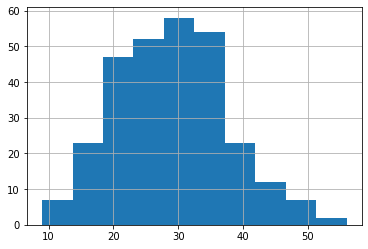

In [108]:
df_nfl['ptsW'].hist()

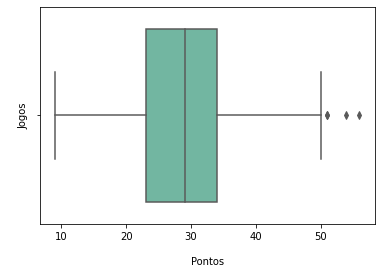

In [110]:
# BoxPlot
ax = sns.boxplot(x = df_nfl['ptsW'], palette = "Set2", orient = "h")
plt.ylabel('\nJogos')
plt.xlabel('\nPontos')
plt.show()

Analisando o Boxplot podemos ver que para vencer uma partida na última temporada, o time precisou marcar entre 23 e 34 pontos. Também podemos observar que existem 3 valores outliers em nossos dados.

In [111]:
# Teste de normalidade com Pingouin
x = df_nfl['ptsW']
pg.normality(x)

,W,pval,normal
ptsW,0.989379,0.03548,False


A fim de verificar se os dados apresentam uma distribuição Normal, fizemos o teste de normalidade com o pacote Pingouin e verificamos que os dados não apresentam uma distribuição Normal.

Essa verificação é importante para sabermos quais tipos de análises estatísticas podemos aplicar aos dados.

In [3]:
#resumo estatístico dos pontos marcados pelos times perdedores
df_nfl['ptsL'].describe()

count    285.000000
mean      17.000000
std        8.181911
min        0.000000
25%       10.000000
50%       17.000000
75%       22.000000
max       42.000000
Name: ptsL, dtype: float64

A média e mediana dos pontos apresentam um valor igual (17 pontos), vamos criar um histograma para visualizar a distribuição dos dados. 

<AxesSubplot:>

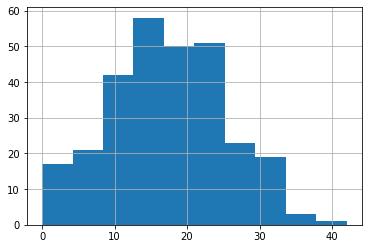

In [4]:
df_nfl['ptsL'].hist()

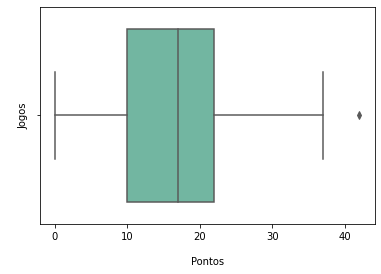

In [5]:
# BoxPlot
ax = sns.boxplot(x = df_nfl['ptsL'], palette = "Set2", orient = "h")
plt.ylabel('\nJogos')
plt.xlabel('\nPontos')
plt.show()

Vemos que o time perdedor marca entre 10 e 22 pontos e que existe um valor outlier em nossos dados.

In [7]:
# Teste de normalidade com Pingouin
x = df_nfl['ptsL']
pg.normality(x)

,W,pval,normal
ptsL,0.987915,0.017507,False


Fazendo o teste de normalidade, verificamos que essa variável também não apresenta uma distribuição Normal.

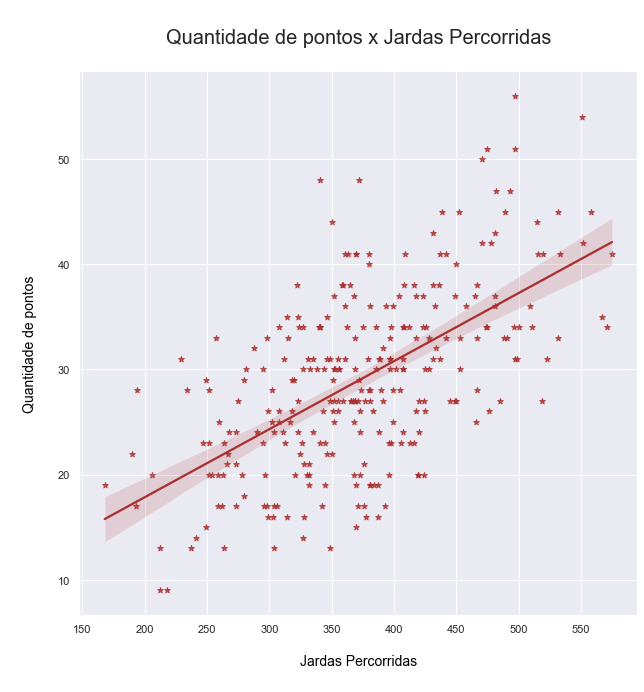

In [119]:
#gráfico de relação entre variáveis
plt.figure(figsize = [10,10])
sns.set()
sns.regplot(x = df_nfl['ydsW'], y = df_nfl['ptsW'], color = '#AA2F2F', marker = '*')
plt.xlabel('\nJardas Percorridas\n', fontsize = 14, color = 'black')
plt.ylabel('\nQuantidade de pontos\n', fontsize = 14, color = 'black')
plt.title('\nQuantidade de pontos x Jardas Percorridas\n', fontsize = 20)
plt.show()

No Futebol Americano o time precisa alcançar a linha de fundo do adversário (touchdown) ou chutar a bola dentro do Y (field goal) para marcar pontos. Logo quanto mais perto da linha de fundo do adversário o time estiver, mais chances dele marcar pontos.
Um touchdown vale 6 pontos e um field goal vale 3 pontos.

Como podemos ver no gráfico um time que percorre mais jardas tende a marcar mais pontos. Porém a ocorrência de um não significa a ocorrência do outro, já que um time pode percorrer muitas jardas e não conseguir marcar pontos. Vai depender muito da eficiência do time que pode percorrer suas jardas e marcar touchdowns ao invés de fiel de gols e assim, marcar mais pontos.